 # Udacity Python Project 
  ## Medical Appointment No Shows
   ### Soner Nefsiogullari

A person makes a doctor appointment, receives all the instructions and no-show. 

I try to analyze 300k medical appointments of the public healthcare of the capital city of Espirito Santo State - Vitoria - Brazil and its 15 variables (characteristics) of each. The most important one if the patient show-up or no-show the appointment. Variable names are self-explanatory, such as Appointment Day, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handicap and SMS received. Scheduled date-time is also recorded in our data, however I have only the date of appointment day without accurate time.

In [2]:
%matplotlib inline  
#to be able to see output of plotting commands directly below the code cell that produced it
import pandas as pd               #to be able to read and make additional analysis
import matplotlib.pylab as pl     #to be able to plot the graphs 
import numpy as np                #for linear algebra
import matplotlib.pyplot as plt   #for graphical analysis
import seaborn as sns             #for graphical analysis

In [3]:
df = pd.read_csv('KaggleV2-May-2016.csv' ) #reading full txt file

In [4]:
df.head() #lets have a look at the raw data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Data consists of 14 columns and 110.527 raws in total. Also notice that Scheduled Day and Appointment Day is not date-time object. I will handle those later.

In [6]:
df.rename(columns = { 'Hipertension': 'Hypertension',     #change the typos and determine suitable column names
                         'Handcap': 'Handicap', 
                     'SMS_received': 'SMSreceived', 'No-show': 'Show'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSreceived', 'Show'],
      dtype='object')


In [7]:
df.head() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
df.Show.replace(('Yes', 'No'), (0, 1), inplace=True)   #change no-show up as "show" for ease of use and better understanding

In [9]:
print('Show-up:' , sorted(df.Show.unique()))  #check whether we have show up data rather than boolean

Show-up: [0, 1]


In [10]:
 print('Gender:' , sorted(df.Gender.unique())) #check whether we have Gender data rather than Female or Male

Gender: ['F', 'M']


In [11]:
for column in df.columns[5:]:
    print(sorted(df[column].unique()))    #lets have a look at other columns

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMB

Handicap is not boolean, a person may have 1 or more disability.

In addition, as it is seen above in the age column we have "-1" value which might be miswritten. Hence I decided to explore some misleading data

In [12]:
print('# of patients whose Age < 0:', len(df[df.Age < 0]))
print('# of patients whose Age = 0:' ,len(df[df.Age == 0]))
print('# of patients whose Age > 100:' ,len(df[df.Age > 100]))

# of patients whose Age < 0: 1
# of patients whose Age = 0: 3539
# of patients whose Age > 100: 7


There is only 1 patient whose age is under zero. In addition there are 7 paients whose ages are greater than 100, although it is unlikely to come up, still not imposibble to see. Thus, I have kept those patients in the DataFrame.

In [13]:
df = df[(df.Age >= 0) ] #getting rid of misleading age data

In [14]:
df.tail() 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,1
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,1
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,1
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,1
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1


In [15]:
df.ScheduledDay = df.ScheduledDay.apply(np.datetime64)  #turn the values to date-time object
df.AppointmentDay = df.AppointmentDay.apply(np.datetime64)

In [16]:
df['IsMale'] = df.Gender.apply(lambda x: 0 if(x=='F') else 1)  #set "ismale" boolean data for ease of percentage calculation

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns]
AppointmentDay    110526 non-null datetime64[ns]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handicap          110526 non-null int64
SMSreceived       110526 non-null int64
Show              110526 non-null int64
IsMale            110526 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(10), object(2)
memory usage: 13.5+ MB


In [18]:
df['sdate'] = df['ScheduledDay'].dt.date  #divide scheduled day to sdate for day or month analysis
df['stime'] = df['ScheduledDay'].dt.time  #divide scheduled time to stime for hourly analysis
df.sdate = df.sdate.apply(np.datetime64)

In [19]:
df['shour'] = pd.to_datetime(df['stime'], format='%H:%M:%S').dt.hour #getting scheduled hour 

In [20]:
df['WaitingDays'] = (df.AppointmentDay-df.sdate).dt.days  #calculate waiting days which is the time interval between Appointment Day and Scheduled Day
print('Waiting Days:' , sorted(df.WaitingDays.unique())) #prints all the unique data in waitingdays column
len(df[df['WaitingDays']<0])  #there may be typo in scheduled time, so I ignore negative waiting times.

Waiting Days: [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


5

We have 5 waiting days data which is less than zero. I decided to set them to zero, assumed as they schedule the appointment in the same day.

In [21]:
df.WaitingDays.replace((-6,-1), (0,0), inplace=True) #ignore negative waiting days
print('Waiting Days:' , sorted(df.WaitingDays.unique()))  #prints all the unique data in waitingdays column

Waiting Days: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [22]:
del df['PatientId']  #I will not make analysis with regards to PatientId and AppointmentID 
del df['AppointmentID']

In [23]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Show,IsMale,sdate,stime,shour,WaitingDays
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,2016-04-29,18:38:08,18,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,1,2016-04-29,16:08:27,16,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,2016-04-29,16:19:04,16,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,2016-04-29,17:29:31,17,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,2016-04-29,16:07:23,16,0


### Questions

 * How does show-up ratio change according to waiting time?
 * Does show-up ratio change with patient age?
 * Does SMS reminder have an effect on show up ratio?
 * Does show up ratio change by gender?
 * Is appointment day important?
 * Does the type of disease affect the show up ratio?

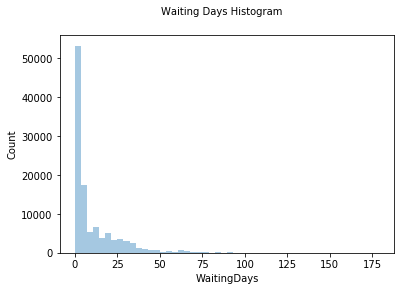

In [32]:
fig = plt.figure()
fig.suptitle('Waiting Days Histogram', fontsize=10)
plt.xlabel('Waiting Days', fontsize=10)
plt.ylabel('Count', fontsize=10)
sns.distplot(df.WaitingDays, bins=50, kde=False)  #use seaborn distplot function for histogram

The waiting days histogram shows that majority of people schedule appointment for the same day. They might need immediate care. Another explanation might be that people tend to wait until illness becomes unbearable.

In [35]:
bins = [-1, 2, 7, 14, 30, 90, 180]  #define categories such as if waiting days<=2 name it is immediate appointment 
labels = ["Immediate","Week", "TwoWeeks", "Month", "Trimester", "Half year"]
wait_period = pd.cut(df.WaitingDays, bins, labels=labels)
df['Waitperiod'] = wait_period

In [36]:
print('Waiting Days:', df.Waitperiod.unique())

Waiting Days: [Immediate, Week, TwoWeeks, Month, Trimester, Half year]
Categories (6, object): [Immediate < Week < TwoWeeks < Month < Trimester < Half year]


I set categories accoring to waiting days time periods.

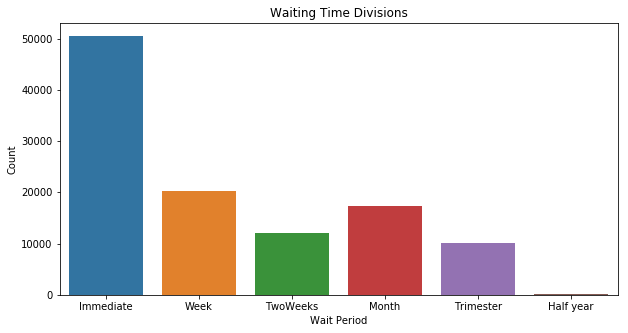

In [44]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Waitperiod', data=df)
ax.set(xlabel='Wait Period', ylabel='Count', title='Waiting Time Divisions')

In [45]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSreceived,Show,IsMale,shour,WaitingDays
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066,0.350026,10.774542,10.183884
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,0.476980,3.216192,15.254962
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,13.000000,15.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,21.000000,179.000000


* Average Age: 37
* SMS received : 32%
* Show up ratio : 80%
* Female / Male : 65 / 35
* Average Waiting Days: 10

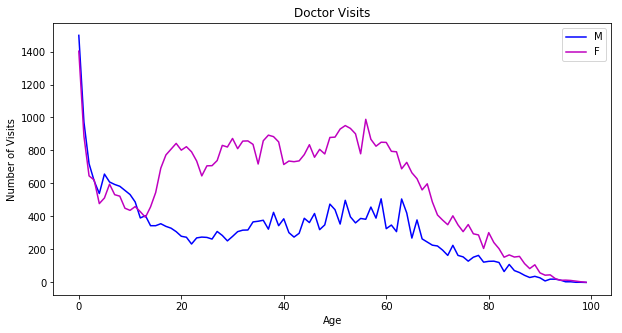

In [46]:
dfs = df[df.Show == 1]   #this particular "doctor visits" figure code was taken from kaggle public exercises.
range_df = pd.DataFrame()
range_df['Age'] = range(100)
men = range_df.Age.apply(lambda x: len(dfs[(dfs.Age == x) & (dfs.IsMale == 1)]))
women = range_df.Age.apply(lambda x: len(dfs[(dfs.Age == x) & (dfs.IsMale == 0)]))
plt.figure(figsize=(10,5))
plt.plot(range(100),men, color= 'b')
plt.plot(range(100),women, color = 'm')
plt.legend(['M','F'])
plt.xlabel('Age')
plt.ylabel('Number of Visits')
plt.title('Doctor Visits')

The graph shows that the age diversity is the same for both genders. There is no significant difference. 

In [47]:
bins = [0,2,6,12,18,40,65,np.inf]
labels=["Baby","Infant","Child","Teenager","Youngs", "Adult","Elder"]
agecat = pd.cut(df.Age,bins,labels=labels)
df['Agecat'] = agecat

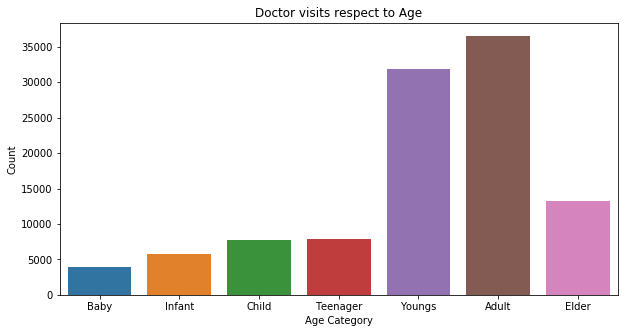

In [49]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x='Agecat', data=df)
ax.set(xlabel='Age Category', ylabel='Count', title='Doctor visits respect to Age')

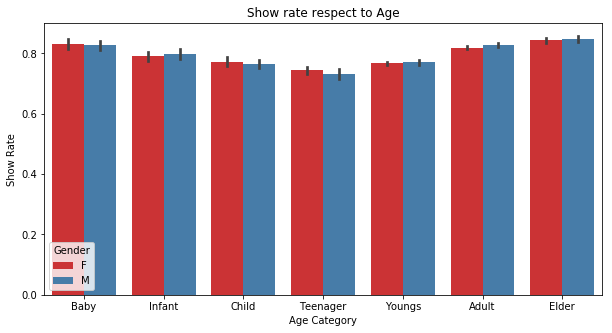

In [50]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x="Agecat", y="Show" , hue="Gender",palette='Set1', data=df)
ax.set(xlabel='Age Category', ylabel='Show Rate', title='Show rate respect to Age')

The show up ratio of elder people and babies are higher than average, while teenagers have the lowest rate.

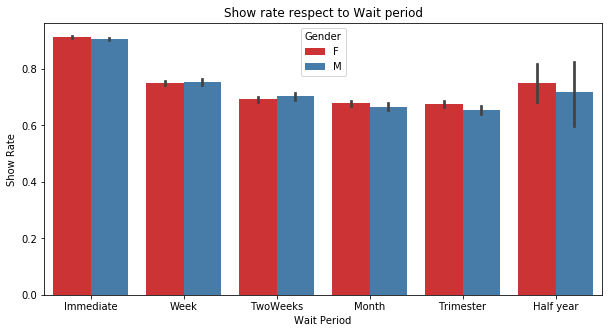

In [52]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x="Waitperiod", y="Show" , hue="Gender",palette='Set1', data=df)
ax.set(xlabel='Wait Period', ylabel='Show Rate', title='Show rate respect to Wait period')

The graph show us if patient schedule appointment just same day or earlier than two days, he/she probably show up. However, by the waiting time increases, the show up ratio decreases for both gender. After a long waiting time, patients show up ratio increases again. 

In [53]:
df['shour'] = df['stime'].apply(lambda x: x.hour)  #trims hour as integer from time data 

In [54]:
current_palette = sns.color_palette("Set1")  #using same colur in following graphs
sns.set_palette(current_palette)

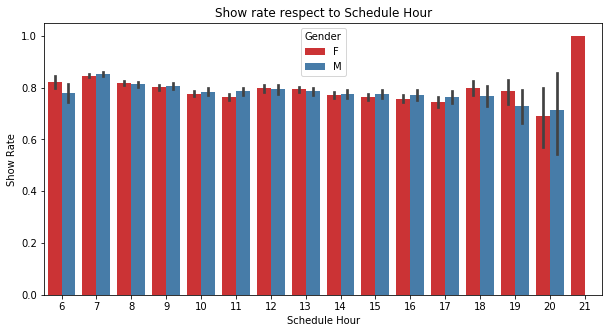

In [55]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x="shour", y="Show" , hue="Gender",data=df)
ax.set(xlabel='Schedule Hour', ylabel='Show Rate', title='Show rate respect to Schedule Hour')

This graph show us that those patients who schedule appointment at 6 am or 8pm are less likely to show up with respect to other times. 

Moreover only women call for appointment after 9pm, there might be a data quality problem or it is somehow forbidden for men to call for an appointment.  

In [56]:
groups = df[['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'IsMale', 'Show']].groupby(['Scholarship', 'Hypertension', 'Diabetes' ,'Alcoholism', 'IsMale'])
gps = pd.DataFrame(groups.mean())
gps["counts"] = groups.count()["Show"]
gps["Show-up"] = groups.sum()["Show"]
gps

Show  counts  Show-up
Scholarship Hypertension Diabetes Alcoholism IsMale                           
0           0            0        0          0       0.793740   48080    38163
                                             1       0.795770   28698    22837
                                  1          0       0.777778     477      371
                                             1       0.827234    1175      972
                         1        0          0       0.810367     791      641
                                             1       0.798715     467      373
                                  1          0       0.600000       5        3
                                             1       0.854545      55       47
            1            0        0          0       0.834815    9111     7606
                                             1       0.826177    3866     3194
                                  1          0       0.755459     229      173
                                             1       0.825954     655      541
                         1        0          0       0.825036    4218     3480
                                             1       0.827715    1602     1326
                                  1          0       0.813333      75       61
                                             1       0.844720     161      136
1           0            0        0          0       0.758422    6768     5133
                                             1       0.759207    1765     1340
                                  1          0       0.622047     254      158
                                             1       0.705882      51       36
                         1        0          0       0.743119     109       81
                                             1       0.714286      14       10
                                  1          0       0.812500      16       13
            1            0        0          0       0.796567    1165      928
                                             1       0.813725     102       83
                                  1          0       0.832215     149      124
                                             1       0.921053      38       35
                         1        0          0       0.796791     374      298
                                             1       0.861111      36       31
                                  1          0       0.666667      18       12
                                             1       0.500000       2        1

As seen in the table above, those people are show up ratio are less than sample mean:
* 60 % show-up rate: women who have diabetes and alcholosim
* 62 % show-up rate: women who have scholarship and alcholosim
* 66 % show-up rate: women who have scholarship, hypertension, diabetes and alcholosim
* 50 % show-up rate: men who have scholarship, hypertension, diabetes and alcholosim

In [57]:
df['a_day'] = df['AppointmentDay'].map(lambda x: x.dayofweek)  #in order to set name of the days

In [58]:
print('Waiting Days:' , sorted(df.a_day.unique()))

Waiting Days: [0, 1, 2, 3, 4, 5]


In [59]:
df['a_day'] = df['a_day'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5:'Saturday' })

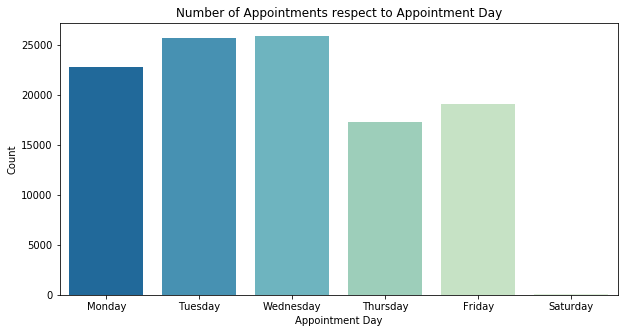

In [60]:
plt.figure(figsize=(10,5))
ax= sns.countplot(x='a_day', palette='GnBu_r', order=['Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday' ], data=df)
ax.set(xlabel='Appointment Day', ylabel='Count', title='Number of Appointments respect to Appointment Day')

People schedule their appointment mostly for tuesdays and wednesdays. Thursdays and Fridays are well below average. In addition, there is no appointment in Sunday.

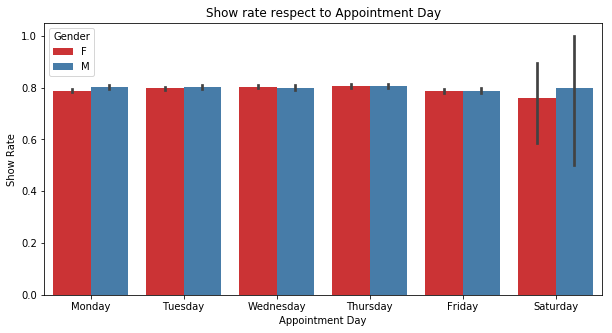

In [61]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x="a_day", y="Show" , hue="Gender", order=['Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'] , data=df)
ax.set(xlabel='Appointment Day', ylabel='Show Rate', title='Show rate respect to Appointment Day')

Although the number of appointments change by the day of the week, there is no significant difference in show up ratio.

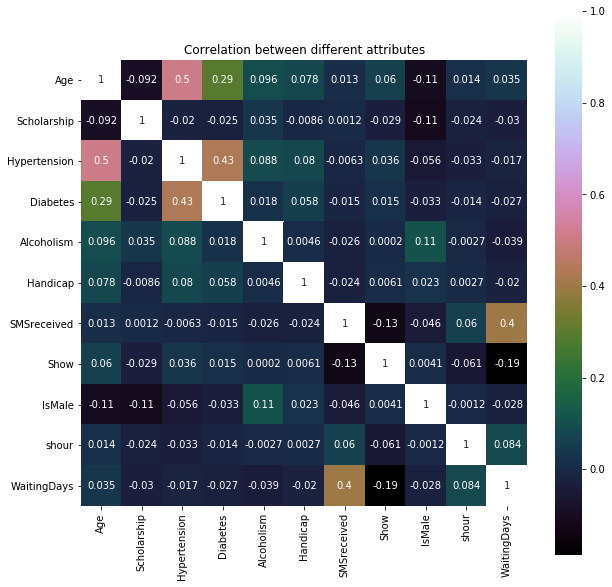

In [62]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

plt.title('Correlation between different attributes')

As seen in the correlation heat map seen above, there is no evidence of correlation between show up and other attributes. It is not a surprise that there is a certain correlation between age and hypertension, also diabetes.

The correlation coefficient between waiting days and SMS reveived is 0.4. This might be about the SMS sending algorithm, they probably send reminder SMS for the people who waits appointment for a certain time. 

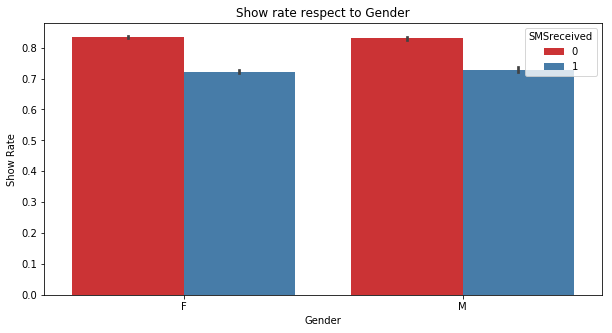

In [63]:
plt.figure(figsize=(10,5)) 
ax= sns.barplot(x="Gender", y="Show", hue="SMSreceived", data=df); 
ax.set(xlabel='Gender', ylabel='Show Rate', title='Show rate respect to Gender')

Interestingly people who received reminder SMS are less likely to show up.

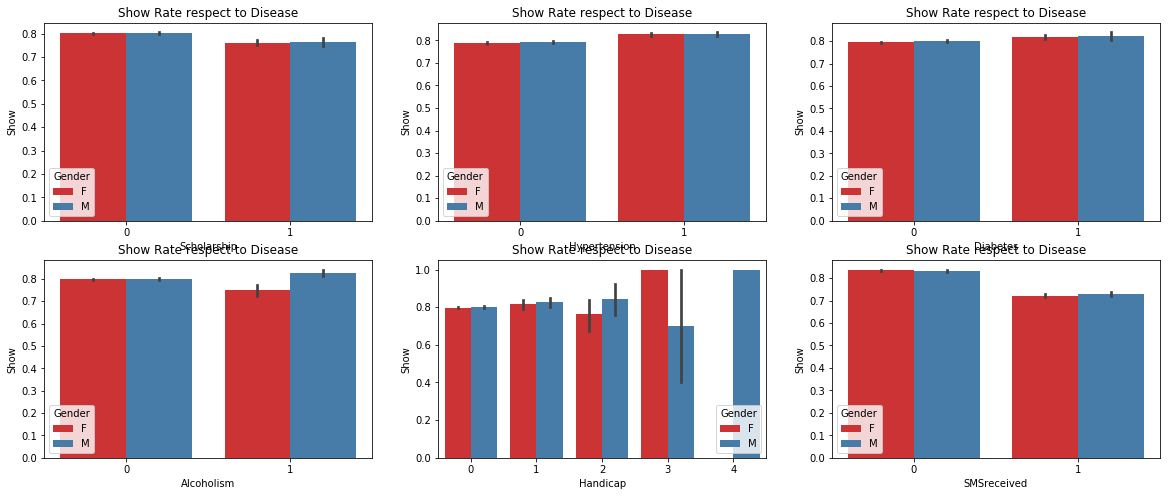

In [64]:
plt.figure(figsize=(20,8))
for i, item in enumerate(df.columns[5:11]):
    plt.subplot(2,3,i+1)
    ax = sns.barplot(x=item , y="Show", hue="Gender", data=df);
    ax.set(title='Show Rate respect to Disease')

As I mentioned before alcoholic females have lower show up ratio comapred to total mean.
Males who has 3 disabilities are less likely to show up compared to females.

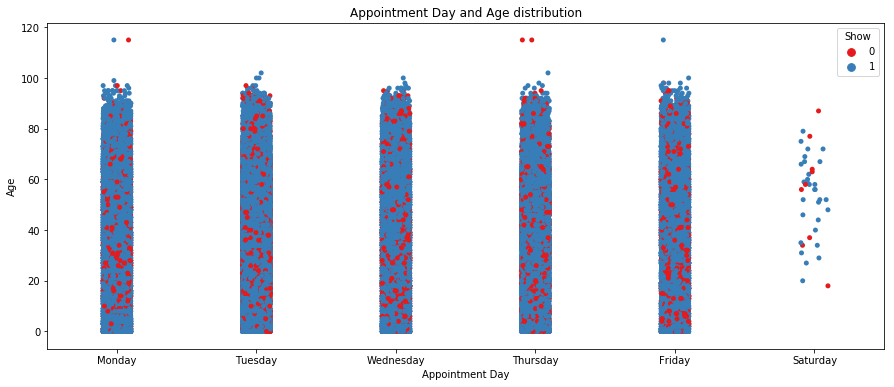

In [65]:
plt.figure(figsize=(15,6))
ax= sns.stripplot(x="a_day", y="Age", hue="Show", 
              order=['Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'],
              data=df, jitter=True);
ax.set(xlabel='Appointment Day', ylabel='Age', title='Appointment Day and Age distribution')

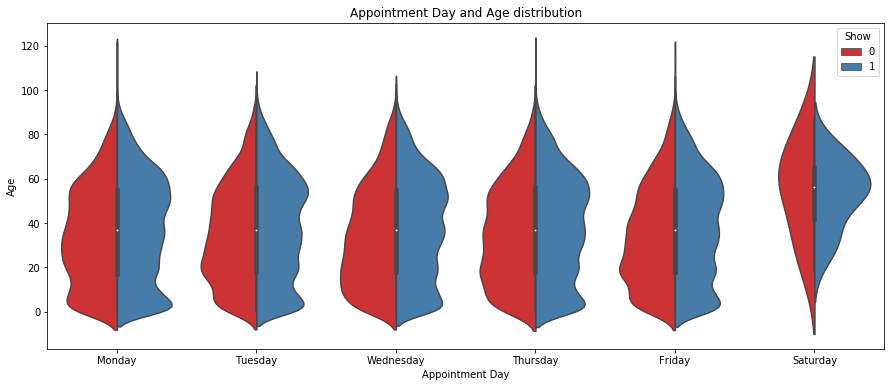

In [66]:
plt.figure(figsize=(15,6))
ax=sns.violinplot(x="a_day", y="Age", hue="Show", 
               order=['Monday','Tuesday','Wednesday', 'Thursday','Friday', 'Saturday'],
               data=df, split=True);

ax.set(xlabel='Appointment Day', ylabel='Age', title='Appointment Day and Age distribution')

The graph shows that the age-variance of no show-up people greater than those showed up at Saturdays.

### Conclusion

I tried to analyze medical appointments in order to understand the common characteristics of no-show people. 
* When patients schedule an appointment immediate or in a few days they probably prefer to visit the hospital. 
* Teenagers have the lowest show up ratio among the all age categories.
* As the waiting days increases, show up ratio decreases.
* Interestingly, people who receives SMS reminder have lower show up rate.
* Gender does not have a significant effect in show up ratio
* Show up ratio does not change according to appointment day.
* Diseases, alcoholosim and disabilities together affect the show up ratio. 
<br>
<br>
#### Limitations:
* We have only one month appointments results in our data. The show rate may vary in other months, or may be it shows seasonality. 
* The distance between hospital and patients home is important. It would be beneficial to analyze the show up ratio, if we knew. 
* There is no "NaN" values in data; however, There are some missing data such as 1 patient whose age is under zero, or waiting days is -6.  We dealed with those misleading data before analyze.
* Regression analysis might be beneficial as well. Logistic regression or Bayesian analysis will give us a chance to check whether data exploration is true or not.